In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv("uci breast cancer dataset (1).csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

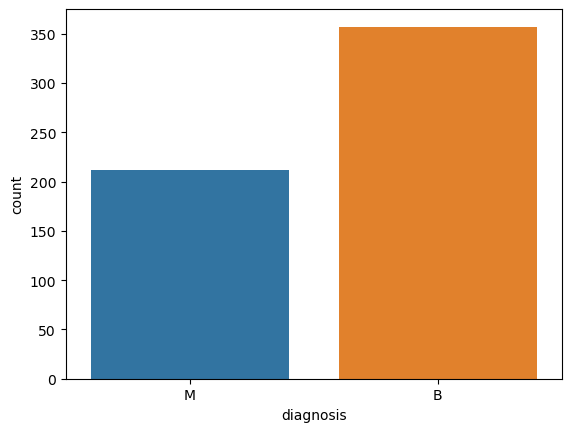

In [6]:
sns.countplot(x='diagnosis', data=df)

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

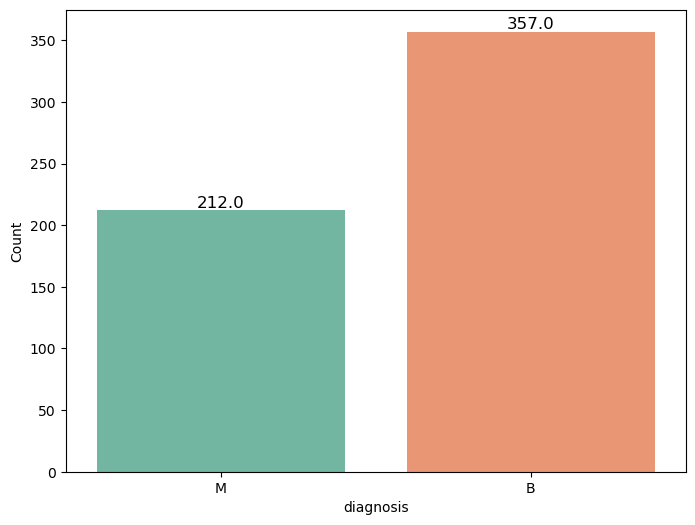

In [8]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='diagnosis', data = df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',(p.get_x()+p.get_width()/2, height), ha='center',va='bottom', fontsize=12)
    
plt.ylabel('Count')
plt.show()



In [9]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [10]:
x.shape

(569, 30)

In [11]:
y.shape

(569,)

# Train and Test Split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [13]:
ytest.shape

(171,)

In [14]:
xtest.shape

(171, 30)

# Step 3: Models Execution and Evaluation

In [15]:
#Decision Tree

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred_dt = dt_model.predict(xtest)
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [18]:
#random_forest

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [20]:
y_pred_rf = rf_model.predict(xtest)

In [21]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [22]:
#XGBoost_Classifier

In [23]:
xgb_model = GradientBoostingClassifier(random_state=42)
xgb_model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [24]:
y_pred_xgb = xgb_model.predict(xtest)
y_pred_xgb

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [25]:
#Ada_boost_Classifier

In [26]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=42)

In [27]:
y_pred_ada = ada_model.predict(xtest)
y_pred_ada

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [28]:
print('Decision Tree Performance')
print('Accuracy:',accuracy_score(ytest, y_pred_dt),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_dt))

print('Random Forest Performance')
print('Accuracy:',accuracy_score(ytest, y_pred_rf),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_rf))

print('XGBoost Performance')
print('Accuracy:',accuracy_score(ytest, y_pred_xgb),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_xgb))

print('AdaBoost Performance')
print('Accuracy:',accuracy_score(ytest, y_pred_ada),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_ada))

Decision Tree Performance
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Random Forest Performance
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

XGBoost Performance
Accuracy: 0.9590643274853801 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
   

# Pre-Tunning for cost Complexity

In [29]:
#define hyperparameters for Decission Tree

dt_params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[None, 5,10,15,20,30],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Random_Forest
rf_params = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[None, 5,10,15,20,30],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#XGBoost
xgb_params = {
    'criterion':['friedman_mse', 'squared_error'],
    'loss':['log_loss','exponential'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split':[1,1,2],
    'max_features':['sqrt','log2'],
    
}

#AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [None],  # You can specify different base estimators here, like DecisionTreeClassifier, etc.
    'algorithm': ['SAMME', 'SAMME.R'],
}


# Perform Grid Search for Avobe Models

In [30]:
#cv = cross_validation

In [31]:
#Grid Search on Decision Tree

In [32]:
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                             param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'splitter': ['best', 'random']})

In [33]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00308514, 0.00330257, 0.00202222, ..., 0.00312591, 0.        ,
        0.00312743]),
 'std_fit_time': array([3.90589053e-03, 6.11949159e-03, 4.47306296e-05, ...,
        6.25181198e-03, 0.00000000e+00, 6.25486374e-03]),
 'mean_score_time': array([0.00057888, 0.00051637, 0.00099998, ..., 0.        , 0.00312324,
        0.        ]),
 'std_score_time': array([9.05640547e-04, 6.58778421e-04, 3.16297988e-07, ...,
        0.00000000e+00, 6.24647141e-03, 0.00000000e+00]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'aut

In [35]:
tunning_result_for_dt = pd.DataFrame(dt_grid_search.cv_results_)
tunning_result_for_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003085,0.003906,0.000579,9.056405e-04,gini,None,auto,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9000,0.925,0.9500,0.911392,0.936709,0.924620,0.017729,432
1,0.003303,0.006119,0.000516,6.587784e-04,gini,None,auto,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9000,0.900,0.9750,0.962025,0.924051,0.932215,0.031182,90
2,0.002022,0.000045,0.001000,3.162980e-07,gini,None,auto,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9250,0.900,0.9500,0.911392,0.911392,0.919557,0.017159,725
3,0.001400,0.000490,0.001000,3.015783e-07,gini,None,auto,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9125,0.925,0.9000,0.924051,0.911392,0.914589,0.009223,1046
4,0.000225,0.000449,0.000000,0.000000e+00,gini,None,auto,1,7,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9125,0.900,0.9625,0.898734,0.911392,0.917025,0.023429,975


In [36]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [37]:
#Grid_Search on Random Forest

In [38]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                             param_grid=rf_params,cv=5)
rf_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300]})

In [39]:
rf_grid_search.cv_results_

{'mean_fit_time': array([0.13288479, 0.25985155, 0.38430166, ..., 0.12132907, 0.23489728,
        0.34783206]),
 'std_fit_time': array([0.00688241, 0.01560926, 0.00804307, ..., 0.00891931, 0.00052112,
        0.00689467]),
 'mean_score_time': array([0.        , 0.00814896, 0.0127193 , ..., 0.00392971, 0.00312471,
        0.00624776]),
 'std_score_time': array([0.        , 0.00702275, 0.00581284, ..., 0.00605767, 0.00624943,
        0.00765191]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],
              

In [40]:
tunning_result_for_rf = pd.DataFrame(rf_grid_search.cv_results_)
tunning_result_for_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132885,0.006882,0.000000,0.000000,gini,None,auto,1,2,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.936709,0.924051,0.949652,0.018059,1683
1,0.259852,0.015609,0.008149,0.007023,gini,None,auto,1,2,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.949367,0.936709,0.954715,0.013016,399
2,0.384302,0.008043,0.012719,0.005813,gini,None,auto,1,2,300,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9625,0.949367,0.936709,0.952215,0.009644,792
3,0.125053,0.000065,0.006251,0.007656,gini,None,auto,1,5,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9750,0.936709,0.949367,0.949715,0.013841,1121
4,0.262610,0.011725,0.003123,0.006247,gini,None,auto,1,5,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9625,0.949367,0.949367,0.949747,0.007912,1005


In [41]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
#XGBoost

In [43]:
xgb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=xgb_params, cv=5)
xgb_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 1, 2],
                         'n_estimators': [100, 200, 300]})

In [44]:
xgb_grid_search.cv_results_

{'mean_fit_time': array([4.10938263e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00796127e-04, 4.00733948e-04, 8.59022141e-02, 1.90271187e-01,
        2.79967022e-01, 0.00000000e+00, 1.25885010e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.34259033e-02,
        1.59029436e-01, 2.37602282e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.37952042e-02, 1.81309748e-01, 2.84713364e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.44300747e-02, 1.59454107e-01, 2.40725613e-01,
        0.00000000e+00, 0.00000000e+00, 2.17771530e-04, 0.00000000e+00,
        1.60207748e-03, 0.00000000e+00, 9.65567112e-02, 1.81427574e-01,
        2.59488630e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.81312943e-02,
        1.59367037e-01, 2.34478092e-01, 0.00000

In [45]:
tunning_result_for_xgb = pd.DataFrame(xgb_grid_search.cv_results_)
tunning_result_for_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000411,0.000597,0.0,0.0,friedman_mse,0.01,log_loss,sqrt,1,100,"{'criterion': 'friedman_mse', 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
1,0.000000,0.000000,0.0,0.0,friedman_mse,0.01,log_loss,sqrt,1,200,"{'criterion': 'friedman_mse', 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
2,0.000000,0.000000,0.0,0.0,friedman_mse,0.01,log_loss,sqrt,1,300,"{'criterion': 'friedman_mse', 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
3,0.000000,0.000000,0.0,0.0,friedman_mse,0.01,log_loss,sqrt,1,100,"{'criterion': 'friedman_mse', 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
4,0.000201,0.000402,0.0,0.0,friedman_mse,0.01,log_loss,sqrt,1,200,"{'criterion': 'friedman_mse', 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73


In [46]:
xgb_grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [47]:
#AdaBoost 

In [48]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}


In [49]:
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                              param_grid=ada_params, cv=5)


In [50]:
ada_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [51]:
ada_grid_search.cv_results_

{'mean_fit_time': array([0.10263228, 0.2081234 , 0.38962107, 0.10311904, 0.190626  ,
        0.38749547, 0.10010757, 0.19998255, 0.38454943, 0.09657931,
        0.20951915, 0.40352507, 0.09999619, 0.20318775, 0.41288061,
        0.10013695, 0.20332384, 0.40647087]),
 'std_fit_time': array([0.00727384, 0.0139116 , 0.00797687, 0.00765486, 0.00629047,
        0.00624809, 0.01244593, 0.00623984, 0.00780712, 0.00641969,
        0.00762507, 0.0117645 , 0.0076568 , 0.00016961, 0.01274473,
        0.00779345, 0.00024461, 0.0099903 ]),
 'mean_score_time': array([0.00082541, 0.00325751, 0.01564264, 0.        , 0.01250024,
        0.01250567, 0.00938148, 0.00312481, 0.01562977, 0.00980392,
        0.00625038, 0.01876793, 0.00312843, 0.00624881, 0.01562829,
        0.00625391, 0.00625076, 0.01875505]),
 'std_score_time': array([1.65081024e-03, 6.51502609e-03, 9.42160724e-06, 0.00000000e+00,
        6.25011987e-03, 6.25283892e-03, 7.65995163e-03, 6.24961853e-03,
        4.27028907e-06, 8.02595972e-

In [52]:
tunning_result_for_ada = pd.DataFrame(ada_grid_search.cv_results_)
tunning_result_for_ada.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102632,0.007274,0.000825,0.001651,SAMME,0.01,50,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9125,0.9125,0.936709,0.924051,0.927152,0.014508,18
1,0.208123,0.013912,0.003258,0.006515,SAMME,0.01,100,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9250,0.9125,0.936709,0.962025,0.937247,0.017546,16
2,0.389621,0.007977,0.015643,0.000009,SAMME,0.01,200,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9500,0.9375,0.949367,0.949367,0.947247,0.004882,13
3,0.103119,0.007655,0.000000,0.000000,SAMME,0.1,50,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9625,0.9250,0.9625,0.962025,0.962025,0.954810,0.014907,11
4,0.190626,0.006290,0.012500,0.006250,SAMME,0.1,100,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9625,0.9375,0.9625,0.974684,0.962025,0.959842,0.012152,7


In [53]:
ada_grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}

In [54]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))

y_pred_xgb_gs = xgb_grid_search.predict(xtest)
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_xgb_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_xgb_gs))

y_pred_ada_gs = dt_grid_search.predict(xtest)
print("\nAdaBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ada_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_ada_gs))


Decision Tree Performance:
Accuracy: 0.935672514619883
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.95      0.95       108
           M       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Random Forest Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


XGBoost Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
    

# Apply Randomized search for Above Models

In [55]:
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42)
                                     , param_distributions=dt_params, cv=5, n_iter=1000)
dt_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'splitter': ['best', 'random']})

In [56]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00084677, 0.00200315, 0.00139947, 0.        , 0.        ,
        0.        , 0.00312409, 0.        , 0.        , 0.        ,
        0.00312471, 0.00312505, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00312457, 0.        , 0.003125  ,
        0.0031251 , 0.        , 0.        , 0.0031249 , 0.00312505,
        0.003125  , 0.        , 0.00312519, 0.00312495, 0.        ,
        0.00312486, 0.00312514, 0.        , 0.00312495, 0.        ,
        0.00312486, 0.00312529, 0.00312495, 0.        , 0.        ,
        0.        , 0.003125  , 0.0031261 , 0.00312386, 0.        ,
        0.00312257, 0.        , 0.00314012, 0.        , 0.        ,
        0.00312552, 0.00312514, 0.00311069, 0.        , 0.00312362,
        0.        , 0.00312443, 0.00312572, 0.        , 0.00312328,
        0.        , 0.        , 0.00312643, 0.00312343, 0.        ,
        0.        , 0.00207319,

In [57]:
tunning_result_for_dt_random_search = pd.DataFrame(dt_random_search.cv_results_)
tunning_result_for_dt_random_search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000847,0.001039,0.002603,4.186992e-03,random,5,4,log2,20,gini,"{'splitter': 'random', 'min_samples_split': 5,...",0.9250,0.9375,0.9375,0.924051,0.873418,0.919494,0.023759,447
1,0.002003,0.000008,0.001000,4.422006e-07,best,10,1,auto,None,gini,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9000,0.9000,0.9500,0.898734,0.911392,0.912025,0.019536,707
2,0.001399,0.000490,0.001029,5.838917e-05,best,10,4,sqrt,30,gini,"{'splitter': 'best', 'min_samples_split': 10, ...",0.8750,0.9000,0.9750,0.898734,0.911392,0.912025,0.033640,707
3,0.000000,0.000000,0.000000,0.000000e+00,best,2,2,log2,30,log_loss,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9375,0.9000,0.9500,0.936709,0.873418,0.919525,0.028475,441
4,0.000000,0.000000,0.000000,0.000000e+00,random,10,2,auto,5,gini,"{'splitter': 'random', 'min_samples_split': 10...",0.9250,0.9125,0.9125,0.924051,0.962025,0.927215,0.018219,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003122,0.006245,0.000000,0.000000e+00,best,2,3,sqrt,20,gini,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9000,0.9000,0.9125,0.924051,0.924051,0.912120,0.010757,671
996,0.003126,0.006252,0.000000,0.000000e+00,random,10,1,auto,20,gini,"{'splitter': 'random', 'min_samples_split': 10...",0.9125,0.9125,0.9125,0.898734,0.924051,0.912057,0.008024,692
997,0.003124,0.006248,0.000000,0.000000e+00,best,7,3,auto,None,entropy,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9125,0.9125,0.9375,0.911392,0.924051,0.919589,0.010084,371
998,0.000000,0.000000,0.003129,6.257725e-03,best,7,4,log2,5,entropy,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9375,0.9000,0.9125,0.949367,0.886076,0.917089,0.023381,483


In [58]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy'}

In [59]:
#Random Search

In [60]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_distributions=rf_params,n_iter=100, cv=5)
rf_random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300]})

In [61]:
rf_random_search.cv_results_

{'mean_fit_time': array([0.2735837 , 0.40641298, 0.118891  , 0.23750196, 0.12187276,
        0.25944662, 0.25638657, 0.11573262, 0.11874866, 0.34406896,
        0.11875219, 0.34372878, 0.3469934 , 0.13125744, 0.39381032,
        0.36270685, 0.39083805, 0.12499752, 0.37500219, 0.26265354,
        0.23133254, 0.25938106, 0.36874962, 0.2562501 , 0.12823377,
        0.35320034, 0.12511787, 0.23760009, 0.34063435, 0.23447099,
        0.12812581, 0.12500138, 0.25953369, 0.23452902, 0.35653982,
        0.26249743, 0.32499924, 0.25595007, 0.12907591, 0.39702511,
        0.37259588, 0.1250783 , 0.41054959, 0.25512934, 0.39393997,
        0.38460522, 0.33139462, 0.23445268, 0.13123565, 0.23749919,
        0.23757172, 0.2531486 , 0.11982808, 0.25626931, 0.35945435,
        0.23464408, 0.13124804, 0.3813592 , 0.35002322, 0.37521544,
        0.11562681, 0.36875181, 0.2596168 , 0.34704614, 0.23437519,
        0.23445134, 0.25002427, 0.25951915, 0.128162  , 0.37843051,
        0.23446708, 0.11562815,

In [62]:
tunning_result_for_rf_random_search = pd.DataFrame(rf_random_search.cv_results_)
tunning_result_for_rf_random_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.273584,0.027534,0.006252,0.007657,200,2,3,auto,30,log_loss,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.9500,0.9375,0.9625,0.949367,0.936709,0.947215,0.009495,66
1,0.406413,0.010061,0.006249,0.007653,300,5,1,auto,20,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.962025,0.936709,0.954747,0.010209,3
2,0.118891,0.007775,0.006252,0.007657,100,5,4,log2,5,log_loss,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.936709,0.936709,0.949684,0.011535,56
3,0.237502,0.006252,0.003123,0.006246,200,5,4,log2,30,entropy,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.936709,0.936709,0.949684,0.011535,56
4,0.121873,0.006249,0.003125,0.006251,100,5,2,log2,None,log_loss,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.936709,0.924051,0.947152,0.014980,89


In [63]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'log_loss'}

In [64]:
#XGBoost 

In [65]:
xgb_random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=xgb_params, n_iter=100, cv=5)
xgb_random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [1, 1, 2],
                                        'n_estimators': [100, 200, 300]})

In [66]:
xgb_random_search.cv_results_

{'mean_fit_time': array([9.40752029e-04, 2.48347139e-01, 2.00271606e-04, 3.94010544e-04,
        3.99684906e-04, 4.00114059e-04, 2.86579132e-05, 0.00000000e+00,
        8.45088959e-02, 0.00000000e+00, 0.00000000e+00, 1.59581757e-01,
        0.00000000e+00, 1.78205633e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.06263828e-02, 2.12677956e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.75078821e-01, 1.56336021e-01,
        0.00000000e+00, 3.12480927e-03, 7.81316280e-02, 0.00000000e+00,
        3.12099457e-03, 0.00000000e+00, 1.81253099e-01, 9.37495708e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.12318802e-03,
        0.00000000e+00, 0.00000000e+00, 2.09427071e-01, 0.00000000e+00,
        1.56326914e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.65765381e-01, 3.12595367e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.63582

In [67]:
tunning_result_for_xgb_random_search = pd.DataFrame(xgb_random_search.cv_results_)
tunning_result_for_xgb_random_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_loss,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000941,0.000647,0.0000,0.0000,200,1,sqrt,exponential,0.1,squared_error,"{'n_estimators': 200, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
1,0.248347,0.012408,0.0004,0.0008,300,2,log2,exponential,0.1,squared_error,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.975,0.9375,0.9625,0.974684,0.924051,0.954747,0.02053,14
2,0.000200,0.000401,0.0000,0.0000,200,1,log2,log_loss,0.01,friedman_mse,"{'n_estimators': 200, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.000394,0.000483,0.0000,0.0000,100,1,sqrt,log_loss,0.2,squared_error,"{'n_estimators': 100, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
4,0.000400,0.000490,0.0000,0.0000,100,1,log2,log_loss,0.01,friedman_mse,"{'n_estimators': 100, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [68]:
xgb_random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'loss': 'exponential',
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

In [69]:
#AdaBoost

In [70]:
ada_random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                      param_distributions=ada_params, n_iter=100, cv=5)
ada_random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]})

In [71]:
ada_random_search.cv_results_

{'mean_fit_time': array([0.09716973, 0.20381446, 0.42773304, 0.10313067, 0.19374857,
        0.38756962, 0.10000281, 0.19391966, 0.38769374, 0.10949373,
        0.20312834, 0.39699359, 0.10318093, 0.20013304, 0.40617471,
        0.09588451, 0.19693084, 0.39998455]),
 'std_fit_time': array([6.10813295e-03, 1.33681122e-02, 1.14566369e-02, 7.65992191e-03,
        7.65339770e-03, 1.17144402e-02, 7.66229486e-03, 7.58144508e-03,
        6.34930807e-03, 1.71949688e-04, 1.81041198e-05, 7.55579958e-03,
        7.69880054e-03, 6.36432060e-03, 7.96123332e-04, 4.28096012e-03,
        7.70318405e-03, 7.71034064e-03]),
 'mean_score_time': array([0.00312605, 0.00904469, 0.00666895, 0.        , 0.00624609,
        0.00938358, 0.00312104, 0.00938053, 0.00937643, 0.        ,
        0.00312419, 0.01874452, 0.00312381, 0.00937567, 0.01709857,
        0.01250834, 0.01250496, 0.01874762]),
 'std_score_time': array([0.0062521 , 0.00549786, 0.00710894, 0.        , 0.00764987,
        0.00766168, 0.00624208, 

In [72]:
tunning_result_for_ada_random_search = pd.DataFrame(ada_random_search.cv_results_)
tunning_result_for_ada_random_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097170,0.006108,0.003126,0.006252,50,0.01,SAMME,"{'n_estimators': 50, 'learning_rate': 0.01, 'a...",0.9500,0.9125,0.9125,0.936709,0.924051,0.927152,0.014508,18
1,0.203814,0.013368,0.009045,0.005498,100,0.01,SAMME,"{'n_estimators': 100, 'learning_rate': 0.01, '...",0.9500,0.9250,0.9125,0.936709,0.962025,0.937247,0.017546,16
2,0.427733,0.011457,0.006669,0.007109,200,0.01,SAMME,"{'n_estimators': 200, 'learning_rate': 0.01, '...",0.9500,0.9500,0.9375,0.949367,0.949367,0.947247,0.004882,13
3,0.103131,0.007660,0.000000,0.000000,50,0.1,SAMME,"{'n_estimators': 50, 'learning_rate': 0.1, 'al...",0.9625,0.9250,0.9625,0.962025,0.962025,0.954810,0.014907,11
4,0.193749,0.007653,0.006246,0.007650,100,0.1,SAMME,"{'n_estimators': 100, 'learning_rate': 0.1, 'a...",0.9625,0.9375,0.9625,0.974684,0.962025,0.959842,0.012152,7


In [73]:
ada_random_search.best_params_

{'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME'}

In [74]:
# Decision Tree and Random Search
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


y_pred_rf_rs = rf_random_search.predict(xtest)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))

y_pred_xgb_rs = xgb_random_search.predict(xtest)
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_xgb_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_xgb_rs))

y_pred_ada_rs = dt_random_search.predict(xtest)
print("\nAdaBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ada_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_ada_rs))


Decision Tree Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       108
           M       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Random Forest Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


XGBoost Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
   

# Post-Pruning For Decision Tree

In [75]:
dt_clf = dt_random_search.best_estimator_

In [76]:
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

[Text(0.5581896551724138, 0.9375, 'perimeter_worst <= 114.45\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.28879310344827586, 0.8125, 'area_worst <= 696.05\nentropy = 0.498\nsamples = 274\nvalue = [244, 30]'),
 Text(0.10344827586206896, 0.6875, 'symmetry_worst <= 0.4\nentropy = 0.192\nsamples = 203\nvalue = [197, 6]'),
 Text(0.06896551724137931, 0.5625, 'smoothness_mean <= 0.09\nentropy = 0.112\nsamples = 200\nvalue = [197, 3]'),
 Text(0.034482758620689655, 0.4375, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.10344827586206896, 0.4375, 'symmetry_se <= 0.017\nentropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.06896551724137931, 0.3125, 'compactness_mean <= 0.06\nentropy = 0.48\nsamples = 29\nvalue = [26, 3]'),
 Text(0.034482758620689655, 0.1875, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.10344827586206896, 0.1875, 'compactness_mean <= 0.118\nentropy = 0.242\nsamples = 25\nvalue = [24, 1]'),
 Text(0.06896551724137931, 0.0625, 'entropy = 0

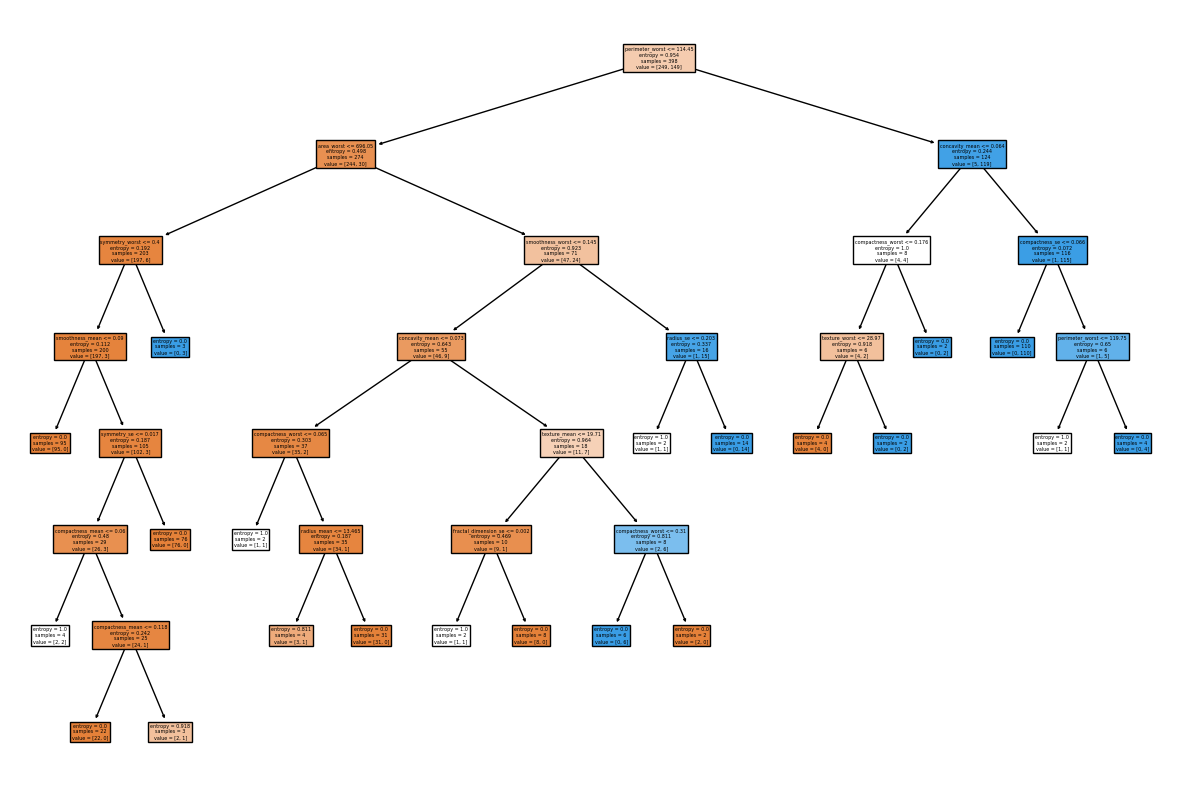

In [77]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names=x.columns)

In [79]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alpha_values = pruning_path.ccp_alphas

In [80]:
ccp_alpha_values

array([0.        , 0.00477421, 0.00675868, 0.00751226, 0.00829753,
       0.00853427, 0.00969303, 0.01005025, 0.01075002, 0.01104097,
       0.01590887, 0.01704352, 0.03500741, 0.04155042, 0.06223372,
       0.08044645, 0.53492075])

In [81]:
clfs_list = []

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004774207361532977, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006758683256012092, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0075122568308552545, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008297530715821361, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008534274034854829, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.009693025019616469, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010050251256281407, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010750016752522143, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.011040967453027847, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0159088716465519, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01704352399624985, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03500740855199806, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.04155041641075968, random_state=42),


In [86]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

In [87]:
train_scores

[1.0,
 0.992462311557789,
 0.9874371859296482,
 0.9874371859296482,
 0.9824120603015075,
 0.9824120603015075,
 0.9824120603015075,
 0.9824120603015075,
 0.9698492462311558,
 0.9698492462311558,
 0.9597989949748744,
 0.9447236180904522,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [89]:
for test_score in test_scores:
    print(test_score)


0.9415204678362573
0.9590643274853801
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9590643274853801
0.9590643274853801
0.9415204678362573
0.9415204678362573
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.631578947368421


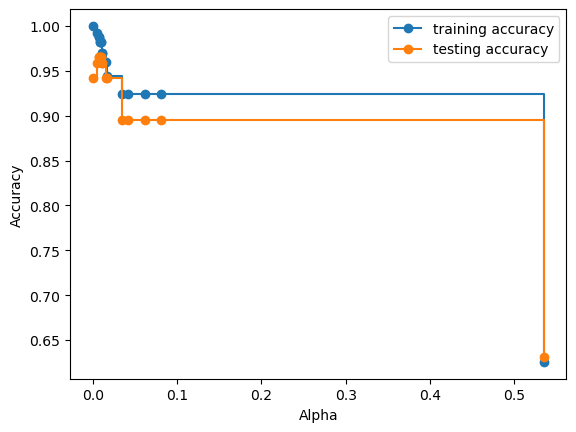

In [91]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [92]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [93]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

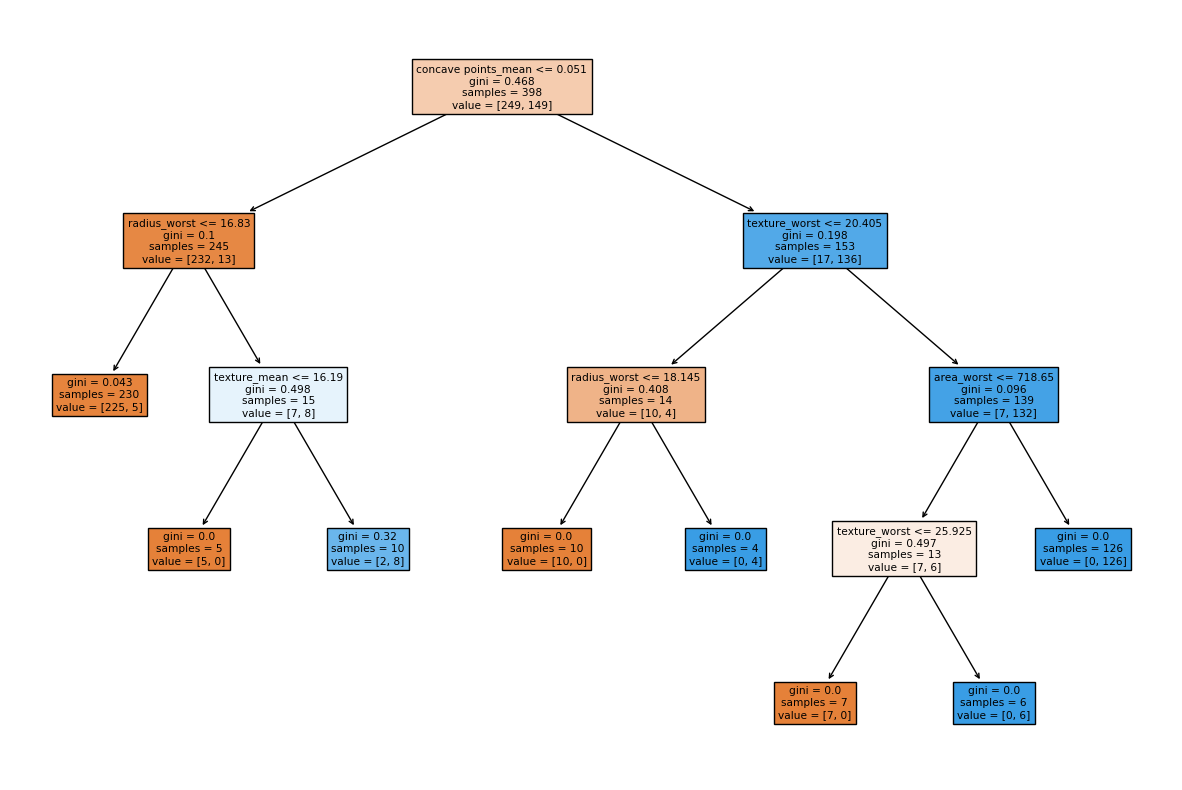

In [94]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# Post-Pruning For XGBoost 

In [103]:
rf_clf = rf_random_search.best_estimator_[0]

In [104]:
rf_clf

DecisionTreeClassifier(criterion='log_loss', max_depth=30, max_features='sqrt',
                       random_state=1608637542)

[Text(0.5, 0.9444444444444444, 'concave points_worst <= 0.142\nlog_loss = 0.954\nsamples = 249\nvalue = [249, 149]'),
 Text(0.23076923076923078, 0.8333333333333334, 'texture_mean <= 19.36\nlog_loss = 0.387\nsamples = 167\nvalue = [244, 20]'),
 Text(0.15384615384615385, 0.7222222222222222, 'log_loss = 0.0\nsamples = 113\nvalue = [185, 0]'),
 Text(0.3076923076923077, 0.7222222222222222, 'area_worst <= 649.7\nlog_loss = 0.816\nsamples = 54\nvalue = [59, 20]'),
 Text(0.23076923076923078, 0.6111111111111112, 'log_loss = 0.0\nsamples = 29\nvalue = [42, 0]'),
 Text(0.38461538461538464, 0.6111111111111112, 'area_mean <= 696.25\nlog_loss = 0.995\nsamples = 25\nvalue = [17, 20]'),
 Text(0.23076923076923078, 0.5, 'compactness_worst <= 0.303\nlog_loss = 0.943\nsamples = 16\nvalue = [16, 9]'),
 Text(0.15384615384615385, 0.3888888888888889, 'fractal_dimension_se <= 0.002\nlog_loss = 0.998\nsamples = 11\nvalue = [8, 9]'),
 Text(0.07692307692307693, 0.2777777777777778, 'log_loss = 0.0\nsamples = 3\nva

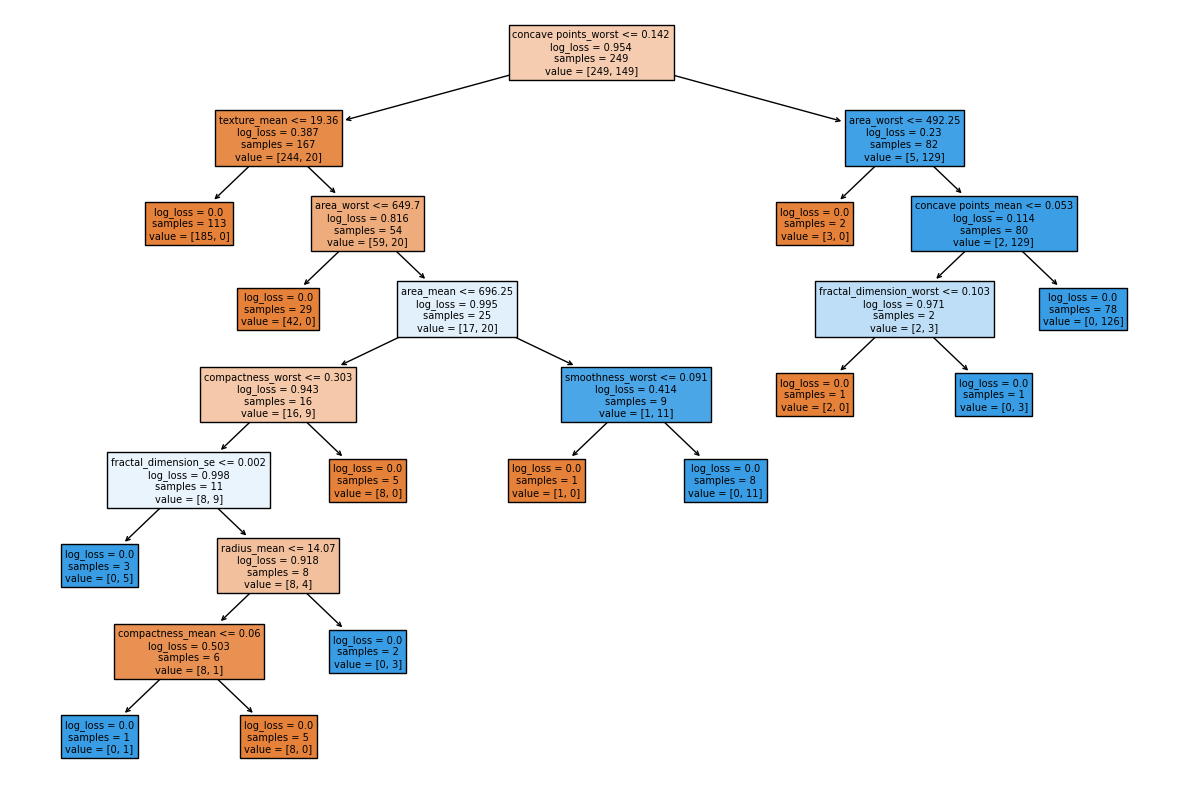

In [105]:
plt.figure(figsize=(15,10))
tree.plot_tree(rf_clf, filled=True, feature_names=x.columns)